<a href="https://colab.research.google.com/github/Saksham008/CyberThreatAnalysisAndMiitigation/blob/main/CyberThreatAnalysisAndMitigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/CB2/CSTR data files.zip"

import zipfile
import os

extract_dir = "/content/sample_data"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)


Mounted at /content/drive
Files extracted to: /content/sample_data


In [ ]:
import scipy.io
Tr_attack = scipy.io.loadmat('/content/sample_data/CSTR_train_attack.mat')
Tr_noise = scipy.io.loadmat('/content/sample_data/CSTR_train_noise.mat')
Tr_normal = scipy.io.loadmat('/content/sample_data/CSTR_train_normal.mat')
Te_attack = scipy.io.loadmat('/content/sample_data/CSTR_test_attack.mat')
Te_noise = scipy.io.loadmat('/content/sample_data/CSTR_test_noise.mat')
Te_normal = scipy.io.loadmat('/content/sample_data/CSTR_test_normal.mat')

In [ ]:
print(Tr_attack)
print(Tr_noise)
print(Tr_normal)
print(Te_attack)
print(Te_noise)
print(Te_normal)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jan 13 19:18:52 2023', '__version__': '1.0', '__globals__': [], 'CSTR_train_attack': array([[279.6853545 , 219.57020743, 197.72234186, ..., 235.96534467,
        235.90655891,   1.        ],
       [284.3864336 , 234.61971   , 209.93598274, ..., 235.91516102,
        236.05535538,   1.        ],
       [293.21831723, 249.04203147, 220.89269193, ..., 235.95081917,
        235.95210503,   1.        ],
       ...,
       [328.0485413 , 275.40201266, 261.7118202 , ..., 235.9498    ,
        235.91679269,   1.        ],
       [335.97388804, 258.64809773, 218.61281335, ..., 235.92889698,
        235.95308579,   1.        ],
       [348.01699668, 257.7146681 , 219.67494517, ..., 235.90267148,
        235.90188937,   1.        ]])}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jan 13 19:18:52 2023', '__version__': '1.0', '__globals__': [], 'CSTR_train_noise': array([[279.6853545 , 219.57020743,

In [ ]:
Train_attack = Tr_attack['CSTR_train_attack']
Train_noise = Tr_noise['CSTR_train_noise']
Train_Normal = Tr_normal['CSTR_train_normal']
Test_attack = Te_attack['CSTR_test_attack']
Test_noise = Te_noise['CSTR_test_noise']
Test_Normal = Te_normal['CSTR_test_normal']

In [ ]:
print("The size of the training dataset for Attack",Train_attack.shape)
print("The size of the training dataset for Noise",Train_noise.shape)
print("The size of the training dataset for Normal",Train_Normal.shape)
print("The size of the testing dataset for Attack",Test_attack.shape)
print("The size of the testing dataset for Noise",Test_noise.shape)
print("The size of the testing dataset for Normal",Test_Normal.shape)

The size of the training dataset for Attack (694, 201)
The size of the training dataset for Noise (694, 201)
The size of the training dataset for Normal (694, 201)
The size of the testing dataset for Attack (15, 201)
The size of the testing dataset for Noise (15, 201)
The size of the testing dataset for Normal (15, 201)


In [ ]:
Combined_training = []
for x in Train_attack[:,:-1]:
  Combined_training.append(x)
for x in Train_noise[:,:-1]:
  Combined_training.append(x)
for x in Train_Normal[:,:-1]:
  Combined_training.append(x)

In [ ]:
Combined_training =np.array(Combined_training)
print("The combined training set",Combined_training.shape)

The combined training set (2082, 200)


In [ ]:
Training_target = []
for x in Train_attack[:,-1]:
  Training_target.append(x)
for x in Train_noise[:,-1]:
  Training_target.append(x)
for x in Train_Normal[:,-1]:
  Training_target.append(x)

In [ ]:
Training_target = np.array(Training_target)
print("The combined target training set",Training_target.shape)

The combined target training set (2082,)


In [ ]:
Combined_testing = []
for x in Test_attack[:,:-1]:
  Combined_testing.append(x)
for x in Test_noise[:,:-1]:
  Combined_testing.append(x)
for x in Test_Normal[:,:-1]:
  Combined_testing.append(x)

In [ ]:
Combined_testing = np.array(Combined_testing)
print("The combined target testing set",Combined_testing.shape)

The combined target testing set (45, 200)


In [ ]:
Target_testing = []
for x in Test_attack[:,-1]:
  Target_testing.append(x)
for x in Test_noise[:,-1]:
  Target_testing.append(x)
for x in Test_Normal[:,-1]:
  Target_testing.append(x)

In [ ]:
Target_testing = np.array(Target_testing)
print("The combined target testing set",Target_testing.shape)

The combined target testing set (45,)


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
target_total_train = enc.fit_transform(Training_target.reshape(-1,1))
target_total_train = np.array(target_total_train)
target_total_test = enc.fit_transform(Target_testing.reshape(-1,1))
target_total_test = np.array(target_total_test)
print("Total Testing size: ",target_total_test.shape)
print("Total Training size: ",target_total_train.shape)

Total Testing size:  (45, 3)
Total Training size:  (2082, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[200,]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 3)                 78        
                                                                 
Total params: 26503 (103.53 KB)
Trainable params: 26503 (103.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras import losses
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=True),
metrics=["accuracy"])
hist = model.fit(Combined_training, target_total_train,epochs=1000, steps_per_epoch=2,validation_steps=2,validation_data = (Combined_testing,target_total_test))

Epoch 1/1000
2/2 [==============================] - 2s 302ms/step - loss: 85.0004 - accuracy: 0.1739 - val_loss: 34.9056 - val_accuracy: 0.2000
Epoch 2/1000
2/2 [==============================] - 0s 54ms/step - loss: 83.6584 - accuracy: 0.1729 - val_loss: 33.6461 - val_accuracy: 0.2000
Epoch 3/1000
2/2 [==============================] - 0s 74ms/step - loss: 82.3056 - accuracy: 0.1734 - val_loss: 32.3825 - val_accuracy: 0.2000
Epoch 4/1000
2/2 [==============================] - 0s 67ms/step - loss: 80.9692 - accuracy: 0.1700 - val_loss: 31.1232 - val_accuracy: 0.2000
Epoch 5/1000
2/2 [==============================] - 0s 62ms/step - loss: 79.6035 - accuracy: 0.1691 - val_loss: 29.8691 - val_accuracy: 0.1778
Epoch 6/1000
2/2 [==============================] - 0s 46ms/step - loss: 78.2524 - accuracy: 0.1667 - val_loss: 28.6149 - val_accuracy: 0.1778
Epoch 7/1000
2/2 [==============================] - 0s 50ms/step - loss: 76.9209 - accuracy: 0.1695 - val_loss: 27.3701 - val_accuracy: 0.155

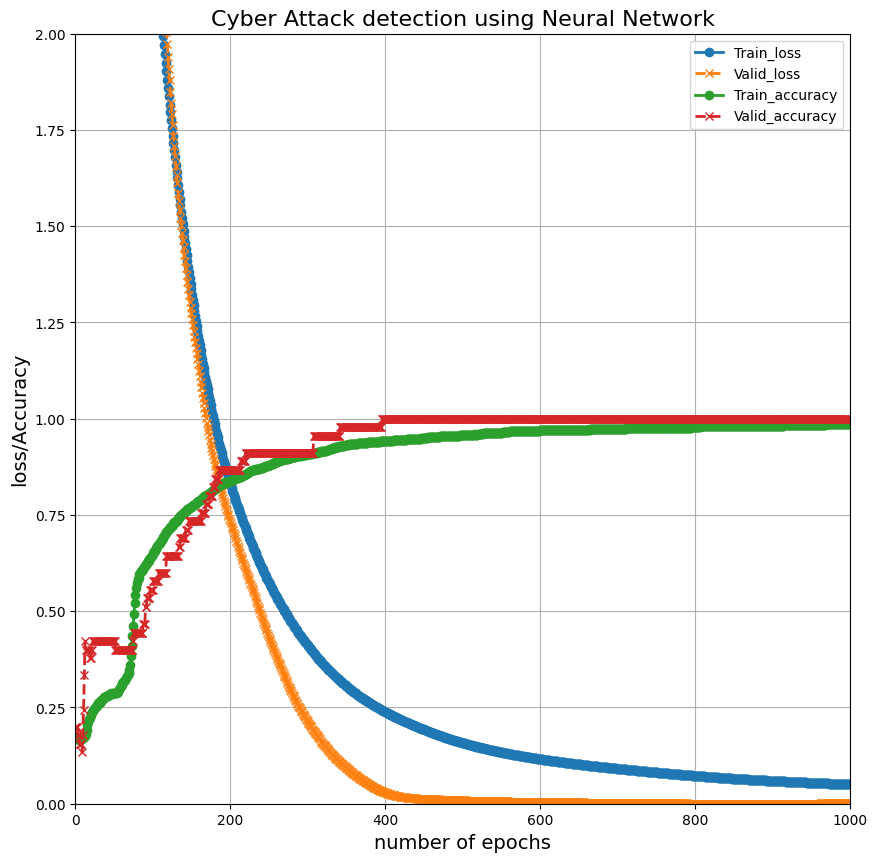

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(hist.history['loss'],label ="Train_loss",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_loss'],label ="Valid_loss",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.plot(hist.history['accuracy'],label ="Train_accuracy",linestyle='solid', linewidth = 2,marker='o', markersize=6)
plt.plot(hist.history['val_accuracy'],label ="Valid_accuracy",linestyle='--', linewidth = 2,marker='x', markersize=6)
plt.gca().set_xlim(0, 1000)
plt.gca().set_ylim(0, 2)
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('loss/Accuracy', fontsize=14)
plt.title('Cyber Attack detection using Neural Network',fontsize=16)
plt.legend()
plt.grid(True)

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(Combined_training, target_total_train, verbose=0)
print("Training Accuracy: ", score[1])
score = model.evaluate(Combined_testing, target_total_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9851104617118835
Testing Accuracy:  1.0
